In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('train.csv')
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.corr()['SalePrice'].sort_values(ascending = False).head(5)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [4]:
train.GrLivArea.isna().sum()

0

In [5]:
train.SalePrice.isna().sum()

0

<AxesSubplot:xlabel='GrLivArea'>

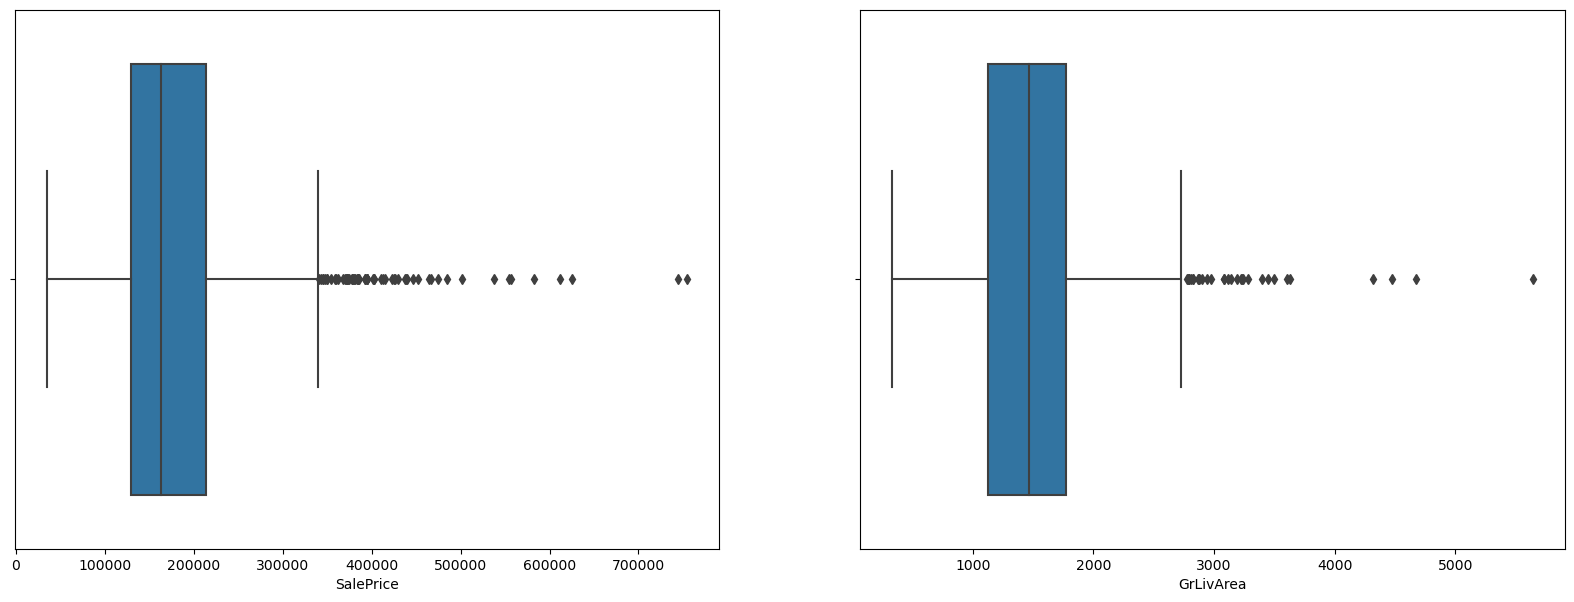

In [7]:
f, axes = plt.subplots(1, 2,figsize = (20,7))
sns.boxplot(data = train,x = 'SalePrice',ax=axes[0])
sns.boxplot(data = train,x = 'GrLivArea',ax=axes[1])

In [8]:
out=[]
def iqr_outliers(train):
    q1 = train.quantile(0.25)
    q3 = train.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in train:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(train['SalePrice'])
iqr_outliers(train['GrLivArea'])

Outliers: [345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000, 556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 410000, 466500, 377500, 394617]
Outliers: [345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000, 556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 410000, 466500, 377500, 394617, 29

In [9]:
print('Total rows before outliers handling (TotalCharges):', len(train))
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((train['SalePrice'] >= low_limit) & (train['SalePrice'] <= high_limit))
train = train[filtered_entries]
print(f'Total rows after outliers handling (TotalCharges):', len(train))

Total rows before outliers handling (TotalCharges): 1460
Total rows after outliers handling (TotalCharges): 1399


In [11]:
print('Total rows before outliers handling (GrLivArea):', len(train))
Q1 = train['GrLivArea'].quantile(0.25)
Q3 = train['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((train['GrLivArea'] >= low_limit) & (train['GrLivArea'] <= high_limit))
train = train[filtered_entries]
print(f'Total rows after outliers handling (GrLivArea):', len(train))

Total rows before outliers handling (GrLivArea): 1378
Total rows after outliers handling (GrLivArea): 1374


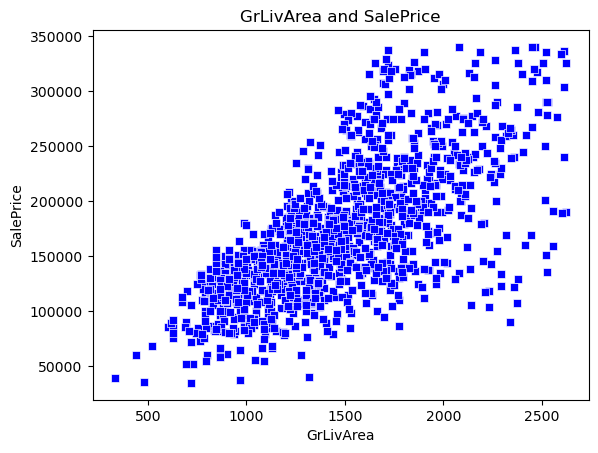

In [13]:
sns.scatterplot(data = train,x = train.GrLivArea, y = train.SalePrice, color = "blue", marker = "s")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title('GrLivArea and SalePrice')
plt.show()

Text(0, 0.5, 'Sales')

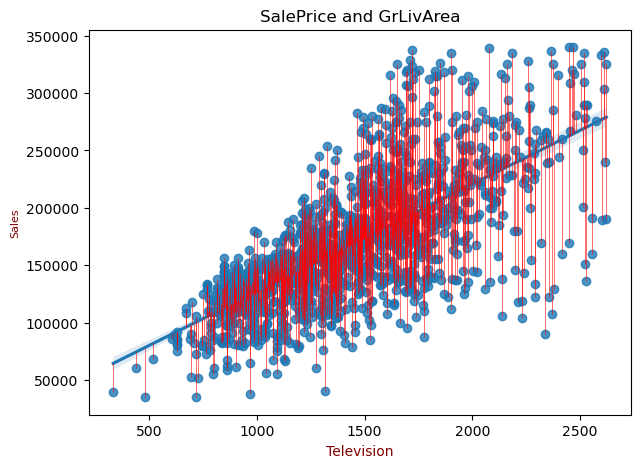

In [14]:
fit = np.polyfit(train['GrLivArea'], train['SalePrice'], deg=1)
y_hat = fit[1] + train['GrLivArea'] * fit[0]

fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(x='GrLivArea', y='SalePrice', data=train)
plt.vlines(train['GrLivArea'], y_hat, train['SalePrice'], lw = .4, colors='r');

plt.title('SalePrice and GrLivArea')
ax.set_xlabel('Television', fontsize=10, color='#800000')
ax.set_ylabel('Sales', fontsize=8, color='#800000')

In [15]:
from sklearn.model_selection import train_test_split

X = train['GrLivArea'].values.reshape(-1,1)
Y = train['SalePrice'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X,Y)

b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  33056.795
slope (b1) :  93.789
 
y = 33056.795 + 93.789 * x


In [17]:
Y_pred = model.predict(X_test)
Y_pred[0:5]

array([[165861.63634046],
       [183493.91753812],
       [184619.38229542],
       [148792.08752144],
       [174771.56566907]])

In [18]:
from sklearn.metrics import mean_squared_error
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(Y_test,Y_pred))))

RMSE for testing data is 43823.733626817404


In [19]:
from sklearn.metrics import r2_score
print('R-squared for training data is {}'.format(r2_score(Y_test,Y_pred)))

R-squared for training data is 0.42927284297350143


In [20]:
from sklearn.metrics import mean_absolute_error
print('MAE for training data is {}'.format(mean_absolute_error(Y_test,Y_pred)))

MAE for training data is 32185.84358212953
